# Supervised Learning for SciKitLearn:

# Course1: Supervised Learning with scikit-learn:
## Chapter1: Classification:

### ML with scikit-learn:
#### What's ML:
#### ML Examples:
#### Unsupervised Learning:
* Uncovering hidden patters and structures from unlabeled data
* Examples:
    * **Clustering** your CXs into distinct categories
#### Supervised ML:
* The predicted values are known
* **Aim**: Predict the target values of unseen data given the features
* Data are already labeled
* Types:
    * **Classification** target variables are sorted into categories
    * **Regression** for continuous variables 
* Requirements for Supervised Learning:
    * No missing data
    * Data in **numeric** format --> for **Regression**
    * Data stored in `pd.DataFrame()` or `np.array()`
* Perform EDA firstly 

#### scikit-learn syntax:
* import a model from sklearn.module:
`from sklearn.module import Model`

* create a model and assign it to a variable:
`model = Model()`

* model fitting:
`model.fit(X, y)`

* extract predictions:
`preds = model.predict(X_new)`


### The Classification Challenge:

In [56]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.style.use('ggplot')

churn_df = pd.read_csv('Datasets/telecom_churn_clean.csv')
churn_df.drop('Unnamed: 0', axis = 1, inplace = True)
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

## The Classification Challenge:
### Four Steps:
1. Build a model
2. Model learns from labeled data
3. Pass unlabeled data to the model as input
4. Model predicts the labels of unseen data

>Labeled Data == Training Data

### kNN:
* looking at the `k` closest labeled point around the unlabeled point we need to classify
* Taking a majority vote



In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)

#split your dataset into X and y, 
#make sure to have them into np.array using `.values` attribute
#`.values` attribute is to avoid using the column hearders and only deal with the values as a np.array
# this step is crucially important to transform your data from a pd.Series to a np.array
X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values
knn.fit(X,y)

X_new = np.array([[56.8, 17.5],
                 [24.4, 24.1],
                 [50.1, 10.9]])

y_new = knn.predict(X_new)
y_new

array([1, 0, 0], dtype=int64)

In [58]:
# Excercise 3:
from sklearn.neighbors import KNeighborsClassifier

X = churn_df[['account_length', 'customer_service_calls']].values
y = churn_df['churn'].values

knn1 = KNeighborsClassifier(n_neighbors = 6)
knn1.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [59]:
# Excercise 4:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

y_pred = knn1.predict(X_new)

print('Predictions: {}'.format(y_pred))

Predictions: [0 1 0]


### Measuring Model Performance:
* How can we know whether our classification model is a good model or not?
* Using accuracy as a commnly used metric
<p align = "center">$Accuracy$ $=$ ${correctPredictions/totalObservations}$</p>

#### How to measure Accuracy:
1. Split you data using `from sklearn.model_selection import train_test_split` this will split your training data into two tables, train table and test table, the train table is used to create a model, and the test table is used to measure accuracy and compare the results the train model

2. We commnly use 20-30% of our data to test:

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)`

* random_state = 21 `#this sets the seed for a rondaom number generator that splits the data`
* stratify = y `ensures that the test array will have the same sample distribution as the target array in the main data`

3. then use the `knn = KNeighborsClassifier(n_neighbors = *)` and go on with your classification steps 
4. then `knn.fit(X_train, y_train)`
5. To check the accuracy, we use `knn.score(X_test, y_test)`

#### Model Complexity:
* **Larger k**: less complex model => can cause underfitting
* **Smaller k**: more complex => can lead to overfitting

#### Model Complexity and over/underfitting:
* We can interpret **k** using a model complexity curve 
* With a knn model, we can calculate acccuracy in train and test sets using k values and plot the results
* Steps:
    * We create empty dictionaries to store our train and test accuracies
    
    `train_accuracies = {}`
    
    `test_accuracies = {}`
    
    * We create an array containing a range of k-values
    
    `neighbors = np.range(1,26)`
    * We use a for-loop to repeat our previous workflow, building several models using a different k every time
    
    `for neighbor in neighbors:`
    
        `knn = KNeighborsClassifier(n_neighbors = neighbor)`
    
        `knn.fit(X_train, y_train)`
        
        `train_accuracies[neighbor] = knn.score(X_train, y_train)`
        
        `test_accuracies[neighbor] = knn.score(X_test, y_test)`
        
     * We then, plot our results:
     
     ```
     plt.figure()
     
     plt.title("KNN: Varying Number of Neighbors")
     
     plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
     
     plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")
     
     plt.legend()
     
     plt.xlabel("Number of Neighbors")
     
     plt.ylabel("Accuracy")
     
     plt.show()
     ```

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Let's do it
#stratify, to make our split population representing of our data
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size = 0.3, 
                                      random_state =21, stratify = y)  

knn2 = KNeighborsClassifier(13)
knn2.fit(Xtr, ytr)

#now, let's check the accuracy using the .score() method
knn.score(Xts, yts)

0.263

Text(0, 0.5, 'Accuracy')

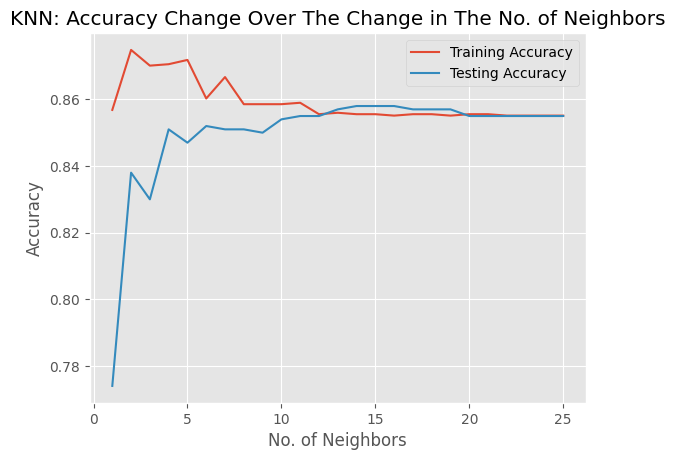

In [61]:
train_acc = {}
test_acc = {}

neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn3 = KNeighborsClassifier(neighbor)
    knn3.fit(Xtr, ytr)
    #knn3.(Xts, yts)
    train_acc[neighbor] = knn3.score(Xtr, ytr)
    test_acc[neighbor] = knn3.score(Xts, yts)
    
plt.title('KNN: Accuracy Change Over The Change in The No. of Neighbors')
plt.plot(neighbors, train_acc.values(), label = 'Training Accuracy')
plt.plot(neighbors, test_acc.values(), label = 'Testing Accuracy')
plt.legend()
plt.xlabel('No. of Neighbors')
plt.ylabel('Accuracy')

In [62]:
#Excercise 5:
from sklearn.model_selection import train_test_split

X4 = churn_df.drop('churn', axis = 1).values
y4 = churn_df['churn'].values

Xtr4, Xts4, ytr4, yts4 = train_test_split(X4, y4, random_state = 42, test_size = 0.2, stratify = y4)

knn4 = KNeighborsClassifier(n_neighbors = 5)

knn4.fit(Xtr4, ytr4)

print(knn4.score(Xts4, yts4))

0.8740629685157422


     k  Training Accuracy  Testing Accuracy
0    1           1.000000          0.794603
1    2           0.903601          0.860570
2    3           0.911478          0.850075
3    4           0.894599          0.869565
4    5           0.895349          0.874063
5    6           0.889347          0.865067
6    7           0.888597          0.871064
7    8           0.886347          0.863568
8    9           0.887097          0.872564
9   10           0.884096          0.866567
10  11           0.887472          0.871064
11  12           0.883721          0.871064


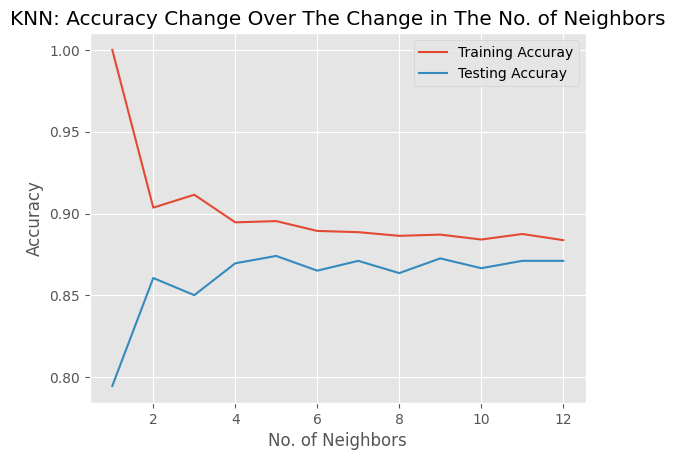

In [63]:
X5 = churn_df.drop('churn', axis = 1).values
y5 = churn_df['churn'].values

Xtr5, Xts5, ytr5, yts5 = train_test_split(X5, y5, test_size = 0.2, 
                                          random_state = 42, stratify = y5)

neighbors2 = np.arange(1, 13)
trAcc = {}
tsAcc = {}

for neighbor2 in neighbors2:
    knn5 = KNeighborsClassifier(neighbor2)
    knn5.fit(Xtr5, ytr5)
    trAcc[neighbor2] = knn5.score(Xtr5, ytr5)
    tsAcc[neighbor2] = knn5.score(Xts5, yts5)
    
df = pd.DataFrame({
    'k': neighbors2,
    'Training Accuracy': trAcc.values(),
    'Testing Accuracy': tsAcc.values()
})

print(df)
    
plt.title('KNN: Accuracy Change Over The Change in The No. of Neighbors')
plt.plot(neighbors2, trAcc.values(), label = 'Training Accuray')
plt.plot(neighbors2, tsAcc.values(), label = 'Testing Accuray')
plt.xlabel('No. of Neighbors')
plt.ylabel('Accuracy')
plt.legend()

## Chapter 2. Regression: 

### Intro to Regression:
* Target variable is continuous
* 

In [64]:
diabetes_df = pd.read_csv('Datasets/diabetes_clean.csv')
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0, 0.5, 'Blood Glucose (mg/dl)')

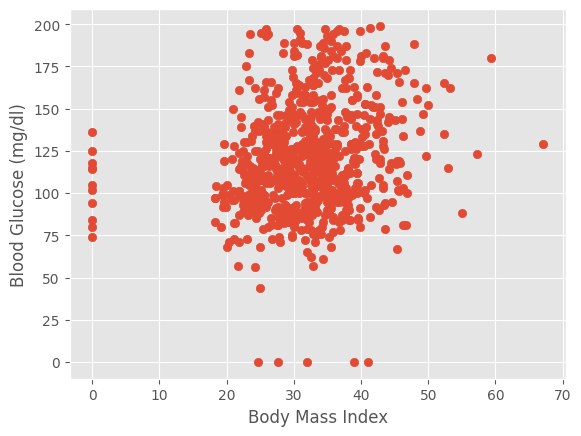

In [65]:
#Our target is the glucose level
X = diabetes_df.drop('glucose', axis = 1).values
y = diabetes_df['glucose'].values
Xbmi = X[:, 4].reshape(-1, 1)
Xbmi.shape

plt.scatter(Xbmi, y)
plt.xlabel('Body Mass Index')
plt.ylabel('Blood Glucose (mg/dl)')

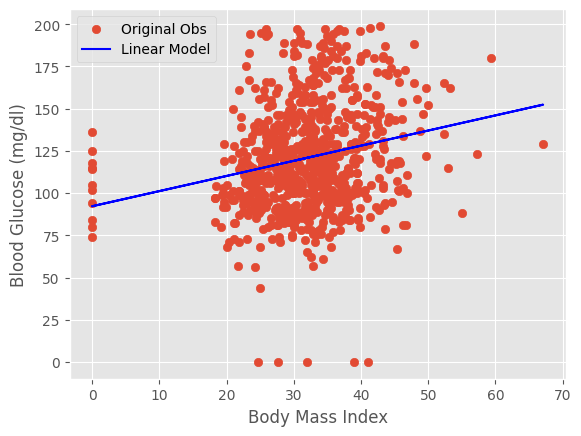

In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xbmi, y)

preds = lr.predict(Xbmi)
plt.scatter(Xbmi, y, label = 'Original Obs')
plt.plot(Xbmi, preds, label = 'Linear Model', color = 'blue')
plt.xlabel('Body Mass Index')
plt.ylabel('Blood Glucose (mg/dl)')
plt.legend()

In [67]:
#Excercise 6
sales_df = pd.read_csv('Datasets/advertising_and_sales_clean.csv')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


In [68]:
X1 = sales_df['radio'].values.reshape(-1, 1)
y1 = sales_df['sales'].values

In [69]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()

reg1.fit(X1, y1)

predictions1 = reg1.predict(X1)
predictions1

array([ 95491.17119147, 117829.51038393, 173423.38071499, ...,
       206147.61403088, 187204.93183873, 174094.31771993])

Text(0, 0.5, 'Sales ($)')

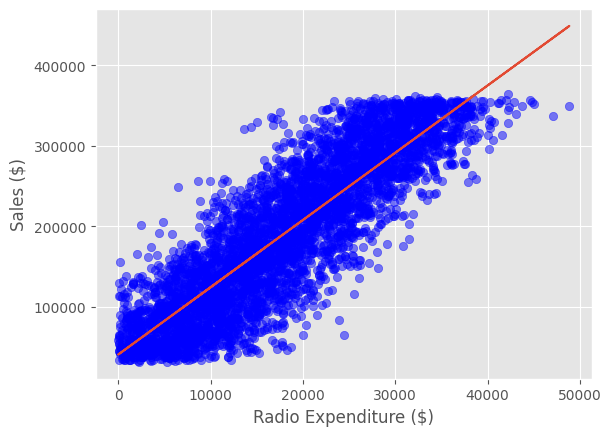

In [70]:
plt.scatter(X1, y1, label = 'Training', color = 'blue', alpha = 0.5)
plt.plot(X1, predictions1, label = 'LR Model')

plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

### The Basics of LR:

#### Regression Mechanics:
* target = `y`
* single/multiple feature(s) = `X`
* parameters = `coef_`, and `intercept_`

* How to calculate the parameters:
    * Define an error function for any given line
    * Choose the line that minimizes the error function (Traial and Error)
    * The erros are called residuals
    * You draw the line, you calcualate the vertical distances between each point and its fit on the line by subtracting the fit from the original point: `y - yfit`
    * You'll get positive nad negative values, and to avoid cancellation, you need to square all the errors (residuals) and sum them all to get the Residual Square Sum `RSS`
    * The line that gets the minimum `RSS` is the best fit
    
* Error function = loss function = loss function

#### R-squared:
* quantifies the variance in target values explained by the features
* represents the correlation value between the features and the target
* Values can range from 0 --> 1
* model.score()

#### Mean Sqared Error `MSE`:
* When you calculate the RSS, divide it by the number of observation, now you get the `MSE`
* The square root defines the mean error value `RMSE`


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X2 = diabetes_df.drop('glucose', axis = 1).values
y2 = diabetes_df['glucose'].values

#you can't use stratify for linear regression, you don't have two variables
Xtr2, Xts2, ytr2, yts2 = train_test_split(X2, y2, test_size = 0.3,
                                         random_state = 42)

reg2 = LinearRegression()

reg2.fit(Xtr2, ytr2)
ypreds2 = reg2.predict(Xts2)
print('R-squared is: {}'.format(reg2.score(Xts2, yts2))) #--> R-squared
print('Square Roor of MSE (RMSE) is: {}'.format(mean_squared_error(yts2, ypreds2, squared = False)))

R-squared is: 0.28280468810375115
Square Roor of MSE (RMSE) is: 26.341459582232265


In [72]:
#Excercise7
X3 = sales_df.drop(['sales', 'influencer'], axis = 1).values
y3 = sales_df['sales'].values

Xtr3, Xts3, ytr3, yts3 = train_test_split(X3, y3, test_size = 0.3,
                                         random_state = 42)

reg3 = LinearRegression()

reg3.fit(Xtr3, ytr3)
ypreds3 = reg3.predict(Xts3)

print('Predictions: {}, Actual Values: {}'.format(ypreds3[:2], yts3[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [73]:
from sklearn.metrics import mean_squared_error
r_squared = reg3.score(Xts3, yts3)
rmse = mean_squared_error(yts3, ypreds3, squared = False)

print('R^2: {}'.format(r_squared))
print('RMSE: {}'.format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001015


### Cross Validation:
* For in regression, you don't have `stratify` argument in the `train_test_split` as regression target is continuous
* You can't be sure that the split would represnt the population distribution
* Model performance depends on how we split the data
* Not representative of the model's ability to generalize to unseen data
* To overcome this, we use cross validation technique

#### Basics of cross validation:
* We split the data multiple times
* Each time will have training and testing data
* We calculate the ML metrics for each time for comparison
* Each time is called **fold**
* k folds = k-fold CV

`from sklearn.model_selection import cross_val_score, KFold`

#### Cross Validation model performance:
* CV is in its own a model
* The more the number of folds, the more computationally expensive your model will be

In [74]:
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.linear_model import LinearRegression
#cross_val_score to calculate R-Squared
#KFold allows us to set a seed and shuffle our data, making our results repeatable downstream

kf = KFold(n_splits = 60, shuffle = True, random_state = 42) #6-fold CV, with shuffling 
reg4 = LinearRegression()

X4 = sales_df.drop(['sales', 'influencer'], axis = 1).values
y4 = sales_df['sales'].values


cv_results = cross_val_score(reg4, X4, y4, cv = kf)
cv_results

array([0.9987774 , 0.9984    , 0.9987332 , 0.99919704, 0.999182  ,
       0.99896017, 0.99900028, 0.99893605, 0.99936586, 0.99917875,
       0.99893361, 0.9990302 , 0.99906452, 0.99905333, 0.99908018,
       0.99891495, 0.99886546, 0.99905751, 0.99876377, 0.9989075 ,
       0.99887535, 0.99919008, 0.99917496, 0.99881992, 0.99880231,
       0.9990191 , 0.99884331, 0.99889742, 0.998933  , 0.99911537,
       0.99880175, 0.99893855, 0.99890653, 0.99904763, 0.99891413,
       0.99897089, 0.99911256, 0.99910164, 0.99887778, 0.99900972,
       0.9983655 , 0.99884807, 0.99911416, 0.99884713, 0.9987916 ,
       0.99926572, 0.99889196, 0.99918764, 0.99872718, 0.9989788 ,
       0.99899546, 0.99888348, 0.99879047, 0.99913798, 0.99919581,
       0.9991412 , 0.99937765, 0.99907857, 0.99902627, 0.9987206 ])

In [75]:
np.mean(cv_results)

0.9989686503504143

In [76]:
np.std(cv_results)

0.00018905790716232783

In [77]:
np.quantile(cv_results, [0.025, 0.975])

array([0.99855228, 0.99931829])